# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br>


2. **Analysing the Data:** <br>
    - Checking the Datatype.
    - Checking the Null values.
- Dividing the dataset into Numerical and Categorical
- Imputing the dependent variable "is_goal" based on the independent variable relationship
- Imputing the categorical variable through factorization
- Deleting the null value rowset.
- Discarding the un related columns


3. **Data Visualization:** Using plots to find relations between the features.
- Bar chart to check Null value in dataset variable
- Facetgrid with scatter plot to check dependent variable point distribution
- Used pairplot to identify the distribution for independent variable
- Used heatmap to identify the relationship between independent variable
- Horizontal bar chart to identify the best feature


3. **Feature selection:** Using diffrent method to choose the feature.
- ExtraTreeClassifier
- RandomForestClassifier
- Information Gain
- Univariate

*Conclusion :- As per the data analysis Information Gain feature selection is resulting best result.

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

In [2]:
pd.set_option('display.max_columns',100)
yds_data = pd.read_csv("yds_data.csv")
yds_data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [3]:
print ("No of records available in dataset : ",yds_data.shape[0])
print ("No of columns available in dataset : ",yds_data.shape[1])

No of records available in dataset :  30697
No of columns available in dataset :  28


In [4]:
yds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30697 non-null  int64  
 1   match_event_id         29134 non-null  float64
 2   location_x             29236 non-null  float64
 3   location_y             29157 non-null  float64
 4   remaining_min          29135 non-null  float64
 5   power_of_shot          29211 non-null  float64
 6   knockout_match         29180 non-null  float64
 7   game_season            24835 non-null  object 
 8   remaining_sec          29103 non-null  float64
 9   distance_of_shot       29130 non-null  float64
 10  is_goal                24429 non-null  float64
 11  area_of_shot           29195 non-null  object 
 12  shot_basics            29122 non-null  object 
 13  range_of_shot          29133 non-null  object 
 14  team_name              29162 non-null  object 
 15  da

In [5]:
yds_data.nunique()

Unnamed: 0               30697
match_event_id             618
location_x                 488
location_y                 450
remaining_min               12
power_of_shot                7
knockout_match               2
game_season                 20
remaining_sec               60
distance_of_shot            73
is_goal                      2
area_of_shot                 6
shot_basics                  7
range_of_shot                5
team_name                    1
date_of_game              1558
home/away                   74
shot_id_number           29134
lat/lng                     38
type_of_shot                57
type_of_combined_shot        6
match_id                  1559
team_id                      1
remaining_min.1            291
power_of_shot.1            206
knockout_match.1           382
remaining_sec.1            354
distance_of_shot.1         271
dtype: int64

#### Null value available in dataset

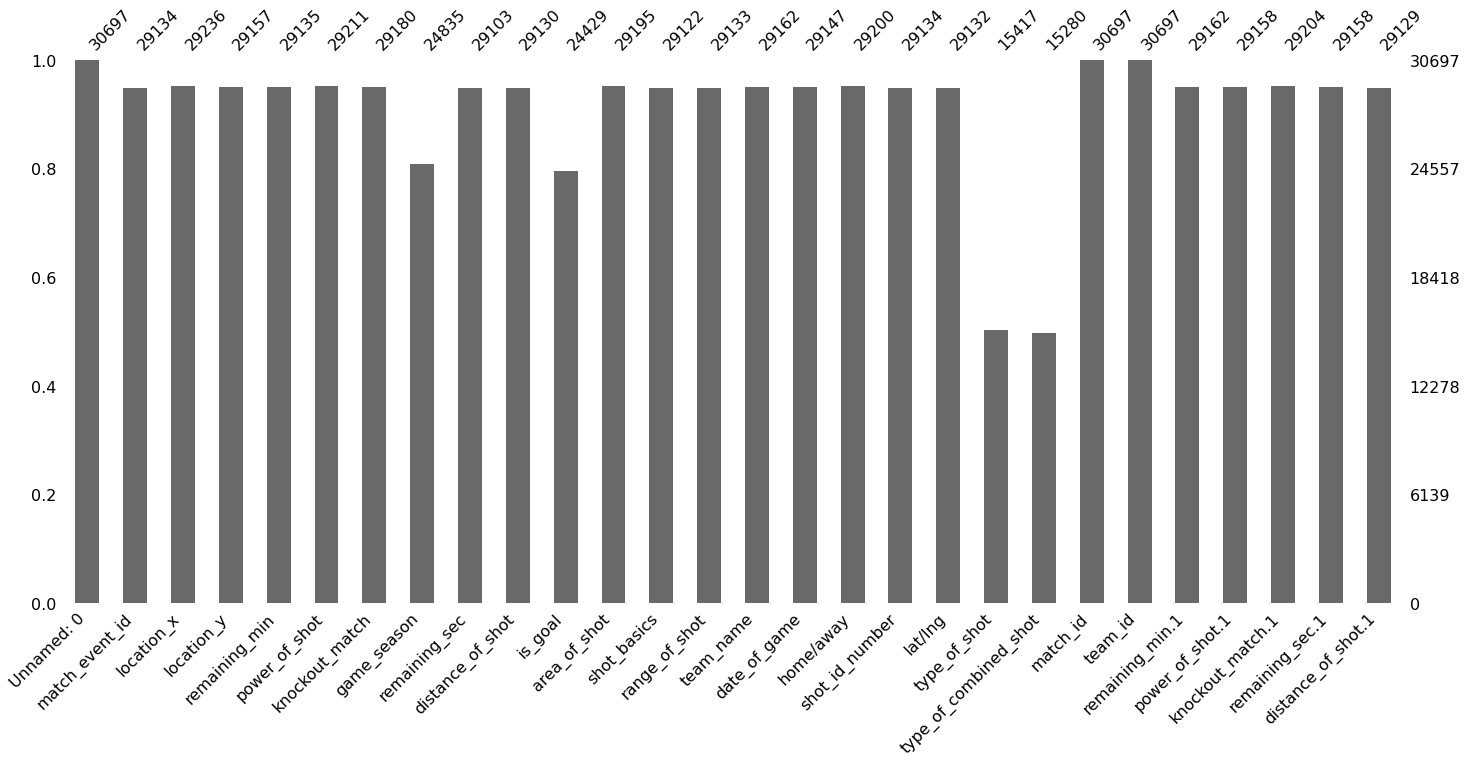

In [6]:
pd.set_option('display.max_columns',100)
msno.bar(yds_data)

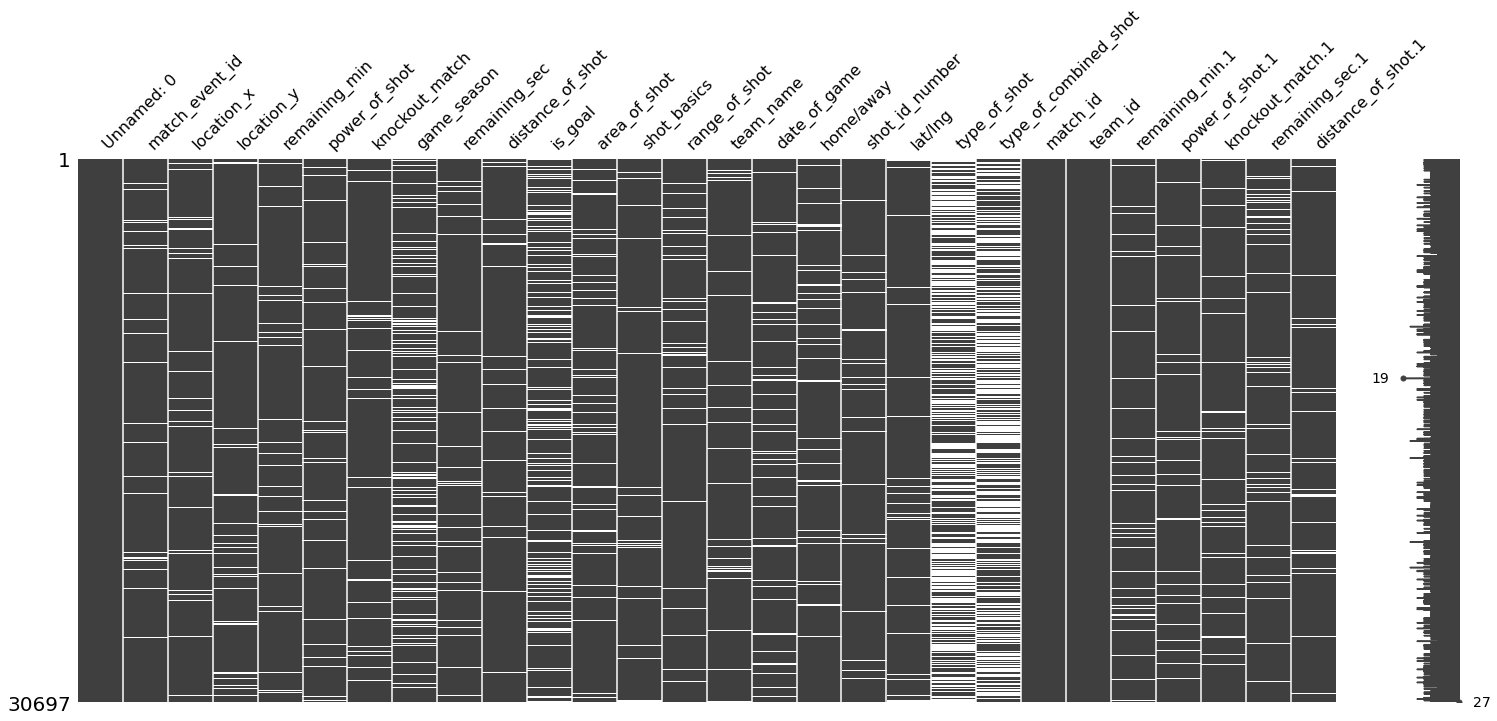

In [7]:
msno.matrix(yds_data)

###### 'Observation :- All the columns has null value other than Unnamed, match_id, team_id columns

#### TYPE_OF_SHOT and TYPE_OF_COMBINED_SHOT has many null value and value of these columns has same value, so mearging these column in to single column (TYPE_OF_COMBINED_SHOT)

In [8]:
for i in yds_data[yds_data['type_of_shot'].notnull()].index:    
    if (str(yds_data['type_of_shot'].iloc[i]) != str('nan')):
        #print(str(i)+"----- "+str(yds_data['type_of_shot'].iloc[i]))
        yds_data.at[i,'type_of_combined_shot'] = str(yds_data['type_of_shot'].iloc[i])

#### Selected the number type columns from the dataset

In [9]:
num_dtype_col = yds_data.select_dtypes(include=np.number).columns.tolist()
yds_data[num_dtype_col].head(5)

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,27.0,38.0,NaN,1.0,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,22.0,35.0,0.0,2.0,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,45.0,36.0,1.0,3.0,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,52.0,42.0,0.0,4.0,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,19.0,20.0,1.0,5.0,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


#### Selected the object type columns from the dataset

In [10]:
obj_dtype_col = yds_data.select_dtypes(include=np.object).columns.tolist()
yds_data[obj_dtype_col].head(5)

,game_season,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,lat/lng,type_of_shot,type_of_combined_shot
0,2000-01,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 30,shot - 30
1,2000-01,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 45,shot - 45
2,2000-01,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,"45.539131, -122.651648",shot - 25,shot - 25
3,2000-01,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,"45.539131, -122.651648",NaN,shot - 3
4,2000-01,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,"45.539131, -122.651648",NaN,shot - 1


#### Fill the missing categorical value

In [11]:
# Categorical Impute - Column - team_name
yds_data['team_name'].fillna(value=str(yds_data['team_name'].mode()),inplace=True)

In [12]:
def fill_with_mode(data,mcol,scol,sval):
    #data.loc[(data[scol]==sval) & (data[mcol].isnull()),mcol] = data[(data[scol]==sval)][mcol].mode()
    return str(data[(data[scol]==sval)][mcol].mode())

In [13]:
def cat_imp ():
    
    # Categorical Impute - Column - range_of_shot, area_of_shot  
    for val in yds_data[yds_data["range_of_shot"].notnull()]["range_of_shot"].unique().tolist():
        yds_data.loc[(yds_data['range_of_shot']==val) & (yds_data['shot_basics'].isnull()),'shot_basics'] = fill_with_mode(yds_data,'shot_basics','range_of_shot',val)
        yds_data.loc[(yds_data['range_of_shot']==val) & (yds_data['area_of_shot'].isnull()),'area_of_shot'] = fill_with_mode(yds_data,'area_of_shot','range_of_shot',val)

    # Categorical Impute - Column - range_of_shot, shot_basics  
    for val in yds_data[yds_data["shot_basics"].notnull()]["shot_basics"].unique().tolist():
        yds_data.loc[(yds_data['shot_basics']==val) & (yds_data['range_of_shot'].isnull()),'range_of_shot'] = fill_with_mode(yds_data,'range_of_shot','shot_basics',val)
        yds_data.loc[(yds_data['shot_basics']==val) & (yds_data['shot_basics'].isnull()),'shot_basics'] = fill_with_mode(yds_data,'area_of_shot','shot_basics',val)

    # Categorical Impute - Column - range_of_shot, shot_basics  
    for val in yds_data[yds_data["area_of_shot"].notnull()]["area_of_shot"].unique().tolist():
        yds_data.loc[(yds_data['area_of_shot']==val) & (yds_data['shot_basics'].isnull()),'shot_basics'] = fill_with_mode(yds_data,'shot_basics','area_of_shot',val)
        yds_data.loc[(yds_data['area_of_shot']==val) & (yds_data['range_of_shot'].isnull()),'range_of_shot'] = fill_with_mode(yds_data,'range_of_shot','area_of_shot',val)    

    # Categorical Impute - Column - lat/lng, home/away
    for val in yds_data[yds_data["lat/lng"].notnull()]["lat/lng"].unique().tolist():
        yds_data.loc[(yds_data['lat/lng']==val) & (yds_data['home/away'].isnull()),'home/away'] = fill_with_mode(yds_data,'home/away','lat/lng',val)




In [14]:
# Call Imputation process
cat_imp()

# Still null value on all columns (area_of_shot, shot_basics and range_of_shot), So that should be filled based on the is_goal column value
for val in yds_data[yds_data["is_goal"].notnull()]["is_goal"].unique().tolist():
    yds_data.loc[(yds_data['is_goal']==val) & (yds_data['shot_basics'].isnull()),'shot_basics'] = fill_with_mode(yds_data,'shot_basics','is_goal',val)

# Calling again imputation process to fill other 2 columns (area_of_shot,range_of_shot)
cat_imp()


# Categorical Impute - Column - lat/lng, home/away
for val in yds_data[yds_data["home/away"].notnull()]["home/away"].unique().tolist():
    yds_data.loc[(yds_data['home/away']==val) & (yds_data['lat/lng'].isnull()),'lat/lng'] = fill_with_mode(yds_data,'lat/lng','home/away',val)
    

In [15]:
# Remove the null record based on the condition.
yds_data = yds_data[yds_data['range_of_shot'].notnull()]
yds_data_copy = yds_data.copy()

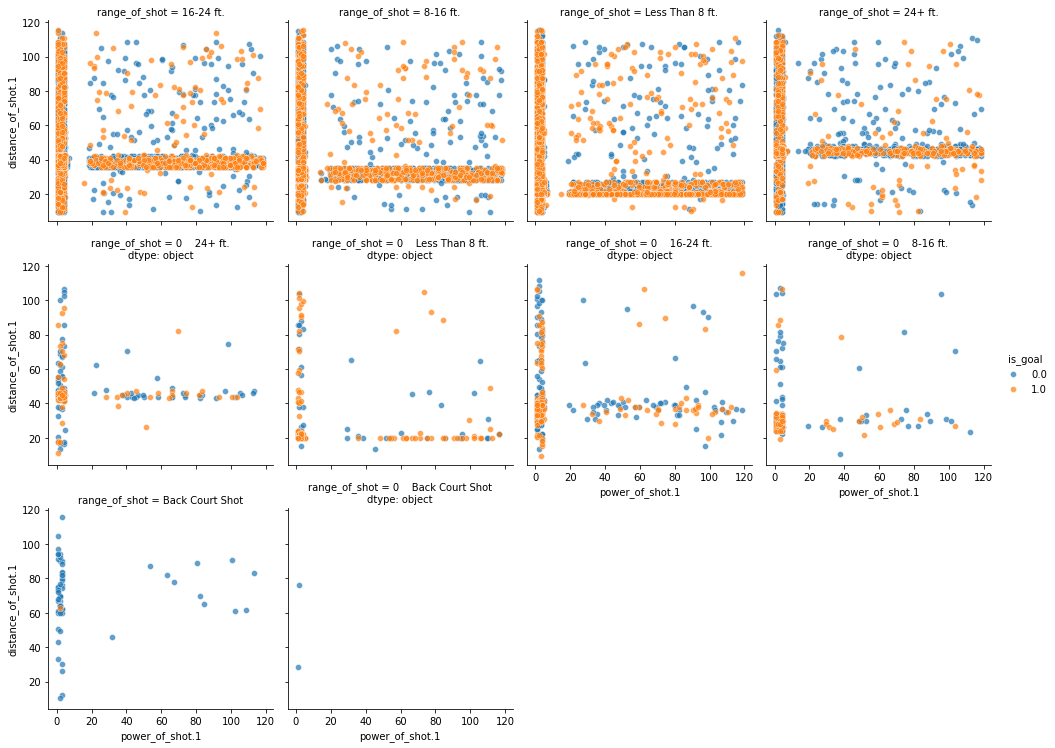

In [16]:
g = sns.FacetGrid(yds_data, col="range_of_shot", hue="is_goal",height=3.5, col_wrap=4)
g.map(sns.scatterplot, "power_of_shot.1", "distance_of_shot.1", alpha=.7)
g.add_legend()

#### Update is_goal = 1 value based on the above graph, Updated value for the range_of_shot = 16-24 ft. 

In [17]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<5) & (is_goal_null['range_of_shot']=='16-24 ft.') & (is_goal_null['distance_of_shot.1']>35) & (is_goal_null['distance_of_shot.1']<42)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the range_of_shot = 8-16 ft.

In [18]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<5) & (is_goal_null['range_of_shot']=='8-16 ft.') & (is_goal_null['distance_of_shot.1']>26) & (is_goal_null['distance_of_shot.1']<37)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the range_of_shot = 8-16 ft.

In [19]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<5) & (is_goal_null['range_of_shot']=='Less Than 8 ft.') & (is_goal_null['distance_of_shot.1']>20) & (is_goal_null['distance_of_shot.1']<27)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the range_of_shot = 24+ ft.

In [20]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<5) & (is_goal_null['range_of_shot']=='24+ ft.') & (is_goal_null['distance_of_shot.1']>40) & (is_goal_null['distance_of_shot.1']<47)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 0 value based on the graph.

In [21]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['range_of_shot']=='Back Court Shot') | (is_goal_null['range_of_shot']=='Back Court Shot\\ndtype: object') | (is_goal_null['shot_basics']=='Mid Ground Line') | (is_goal_null['shot_basics']=='Left Corner') | (is_goal_null['area_of_shot']=='Mid Ground(MG)')].index:
    yds_data.at[i,'is_goal'] = 0

In [22]:
#is_goal_null = yds_data[yds_data['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot']]
is_goal_null.groupby(['range_of_shot'])['range_of_shot'].count()

range_of_shot
0    16-24 ft.\ndtype: object           124
0    24+ ft.\ndtype: object              74
0    8-16 ft.\ndtype: object             42
0    Less Than 8 ft.\ndtype: object      75
16-24 ft.                              1672
24+ ft.                                1186
8-16 ft.                               1214
Back Court Shot                          11
Less Than 8 ft.                        1869
Name: range_of_shot, dtype: int64

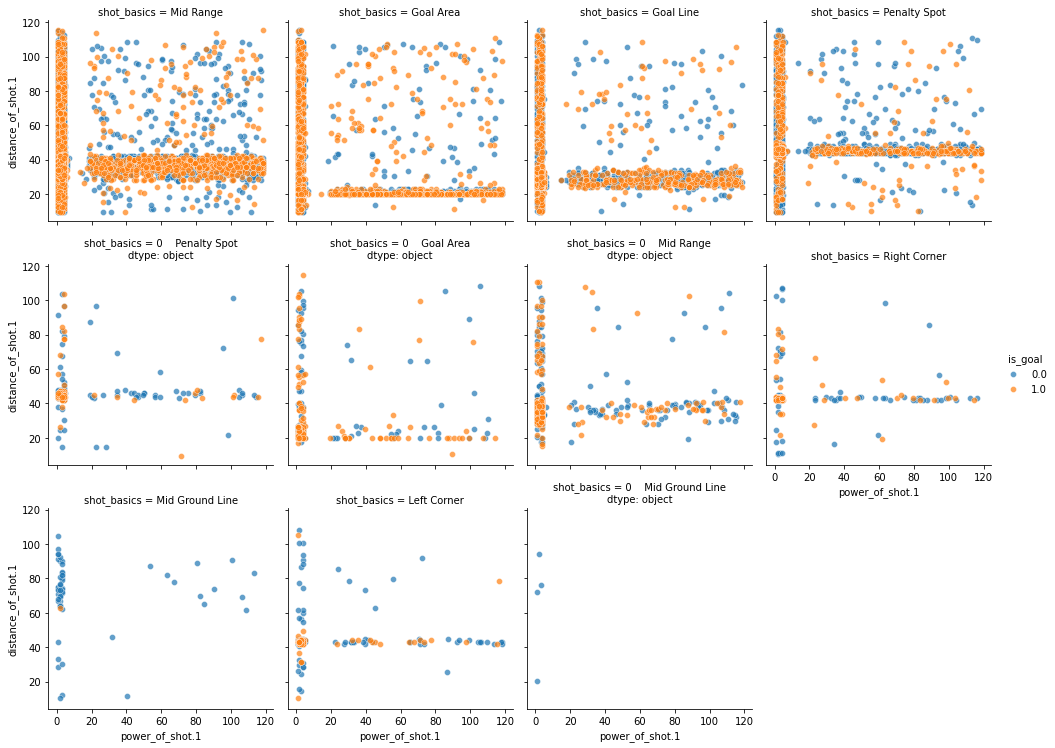

In [23]:
g = sns.FacetGrid(yds_data, col="shot_basics", hue="is_goal",height=3.5, col_wrap=4)
g.map(sns.scatterplot, "power_of_shot.1", "distance_of_shot.1", alpha=.7)
g.add_legend()

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = Mid Range.

In [24]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<5) & (is_goal_null['shot_basics']=='Mid Range') & (is_goal_null['distance_of_shot.1']>29) & (is_goal_null['distance_of_shot.1']<41)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = Goal Area.

In [25]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<4) & (is_goal_null['shot_basics']=='Goal Area') & (is_goal_null['distance_of_shot.1']>20) & (is_goal_null['distance_of_shot.1']<24)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = Goal Line.

In [26]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<4) & (is_goal_null['shot_basics']=='Goal Line') & (is_goal_null['distance_of_shot.1']>23) & (is_goal_null['distance_of_shot.1']<35)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = Penalty Spot.

In [27]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<4) & (is_goal_null['shot_basics']=='Penalty Spot') & (is_goal_null['distance_of_shot.1']>41) & (is_goal_null['distance_of_shot.1']<46)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = 0    Goal Area\ndtype: object.

In [28]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<4) & (is_goal_null['shot_basics']=='0    Goal Area\ndtype: object') & (is_goal_null['distance_of_shot.1']>19) & (is_goal_null['distance_of_shot.1']<22)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = 0    Mid Range\ndtype: object.

In [29]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<4) & (is_goal_null['shot_basics']=='0    Mid Range\ndtype: object') & (is_goal_null['distance_of_shot.1']>19) & (is_goal_null['distance_of_shot.1']<22)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 0 value based on the above graph, Updated value for the shot_basics = Penalty Spot.

In [30]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>19) & (is_goal_null['shot_basics']=='Penalty Spot') & (is_goal_null['distance_of_shot.1']>46)].index:
    yds_data.at[i,'is_goal'] = 0

In [31]:
is_goal_null.groupby(['shot_basics'])['shot_basics'].count()

shot_basics
0    Goal Area\ndtype: object            79
0    Mid Ground Line\ndtype: object       1
0    Mid Range\ndtype: object           144
0    Penalty Spot\ndtype: object         67
Goal Area                              1464
Goal Line                               842
Left Corner                              52
Mid Ground Line                          10
Mid Range                              2467
Penalty Spot                           1076
Right Corner                             65
Name: shot_basics, dtype: int64

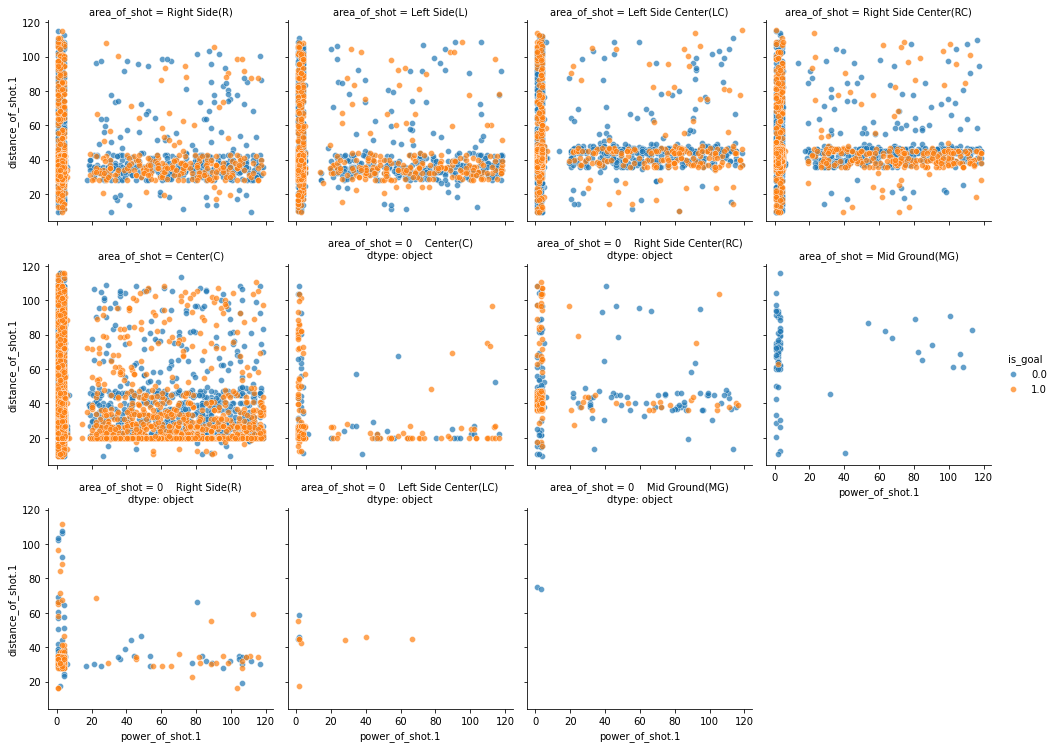

In [32]:
g = sns.FacetGrid(yds_data, col="area_of_shot", hue="is_goal",height=3.5, col_wrap=4)
g.map(sns.scatterplot, "power_of_shot.1", "distance_of_shot.1", alpha=.7)
g.add_legend()

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = Center(C).

In [33]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<4) & (is_goal_null['area_of_shot']=='Center(C)') & (is_goal_null['distance_of_shot.1']>19) & (is_goal_null['distance_of_shot.1']<34)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = Right Side(R).

In [34]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<4) & (is_goal_null['area_of_shot']=='Right Side(R)') & (is_goal_null['distance_of_shot.1']>29) & (is_goal_null['distance_of_shot.1']<35)].index:
    yds_data.at[i,'is_goal'] = 1

#### Update is_goal = 1 value based on the above graph, Updated value for the shot_basics = Right Side Center(RC).

In [35]:
is_goal_null = yds_data_copy[yds_data_copy['is_goal'].isnull()][['range_of_shot','shot_basics','area_of_shot','power_of_shot.1','distance_of_shot.1','is_goal']]
for i in is_goal_null[(is_goal_null['power_of_shot.1']>0) & (is_goal_null['power_of_shot.1']<4) & (is_goal_null['area_of_shot']=='Right Side Center(RC)') & (is_goal_null['distance_of_shot.1']>35) & (is_goal_null['distance_of_shot.1']<44)].index:
    yds_data.at[i,'is_goal'] = 1

In [36]:
is_goal_null.groupby(['area_of_shot'])['area_of_shot'].count()

area_of_shot
0    Center(C)\ndtype: object                 119
0    Left Side Center(LC)\ndtype: object        3
0    Mid Ground(MG)\ndtype: object              1
0    Right Side Center(RC)\ndtype: object     135
0    Right Side(R)\ndtype: object              61
Center(C)                                    2584
Left Side Center(LC)                          817
Left Side(L)                                  725
Mid Ground(MG)                                 10
Right Side Center(RC)                         946
Right Side(R)                                 866
Name: area_of_shot, dtype: int64

#### Convert categorical data to numerical data for the range_of_shot, shot_basics, area_of_shot

In [37]:
cat_to_num_cal = ['range_of_shot','shot_basics','area_of_shot']
for col in cat_to_num_cal:
    #yds_data[col]=yds_data[col].apply(lambda x: pd.factorize(str(x))[0])
    yds_data[col]=yds_data[col].factorize()[0]


In [38]:
yds_data.head(5)

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,1.0,0,0,0,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,shot - 30,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,1,0,1,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,shot - 45,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,2,0,0,Manchester United,2000-10-31,0 MANU @ POR\ndtype: object,3.0,"45.539131, -122.651648",shot - 25,shot - 25,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,3,0,0,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,4,1,2,0 Manchester United\ndtype: object,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


#### Use sklearn IterativeImputer to impute the is_goal, distance_of_shot.1, power_of_shot.1 and knockout_match.1 column value

In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [40]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(yds_data[yds_data['is_goal'].notnull()][['is_goal','area_of_shot','shot_basics','range_of_shot','distance_of_shot.1','power_of_shot.1','knockout_match.1']])
IterativeImputer(random_state=0)
X_test = yds_data[['is_goal','area_of_shot','shot_basics','range_of_shot','distance_of_shot.1','power_of_shot.1','knockout_match.1']]
abc = imp.transform(X_test)
imp_yds_data = pd.DataFrame(abc,columns=['is_goal','area_of_shot','shot_basics','range_of_shot','distance_of_shot.1','power_of_shot.1','knockout_match.1'])

for i in imp_yds_data.index:
    yds_data.at[i,'is_goal'] = int(round(imp_yds_data['is_goal'].iloc[i],0))
    yds_data.at[i,'distance_of_shot.1'] = imp_yds_data['distance_of_shot.1'].iloc[i]
    yds_data.at[i,'power_of_shot.1'] = imp_yds_data['power_of_shot.1'].iloc[i]
    yds_data.at[i,'knockout_match.1'] = imp_yds_data['knockout_match.1'].iloc[i]

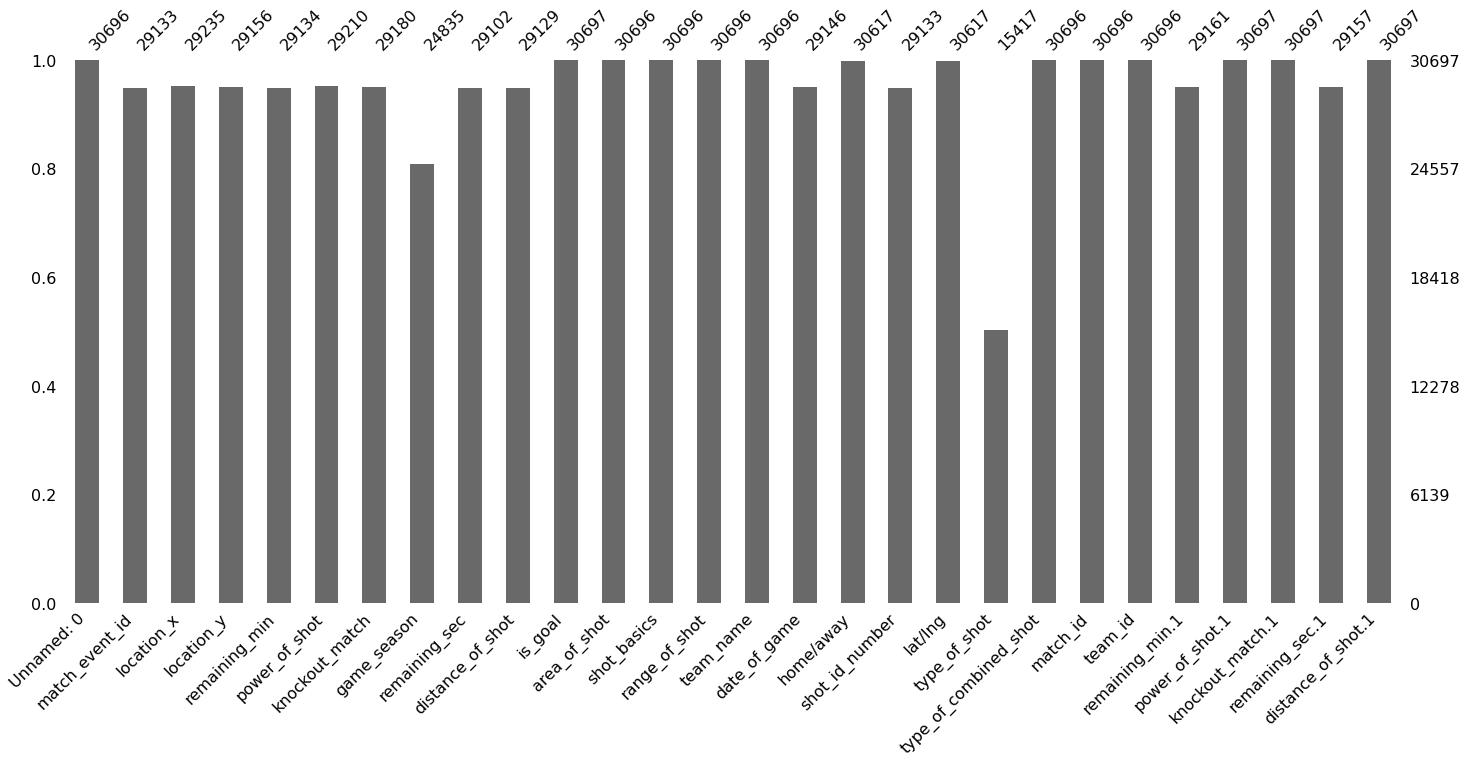

In [41]:
msno.bar(yds_data)

#### Need to remove the duplicate columns from the dataframe

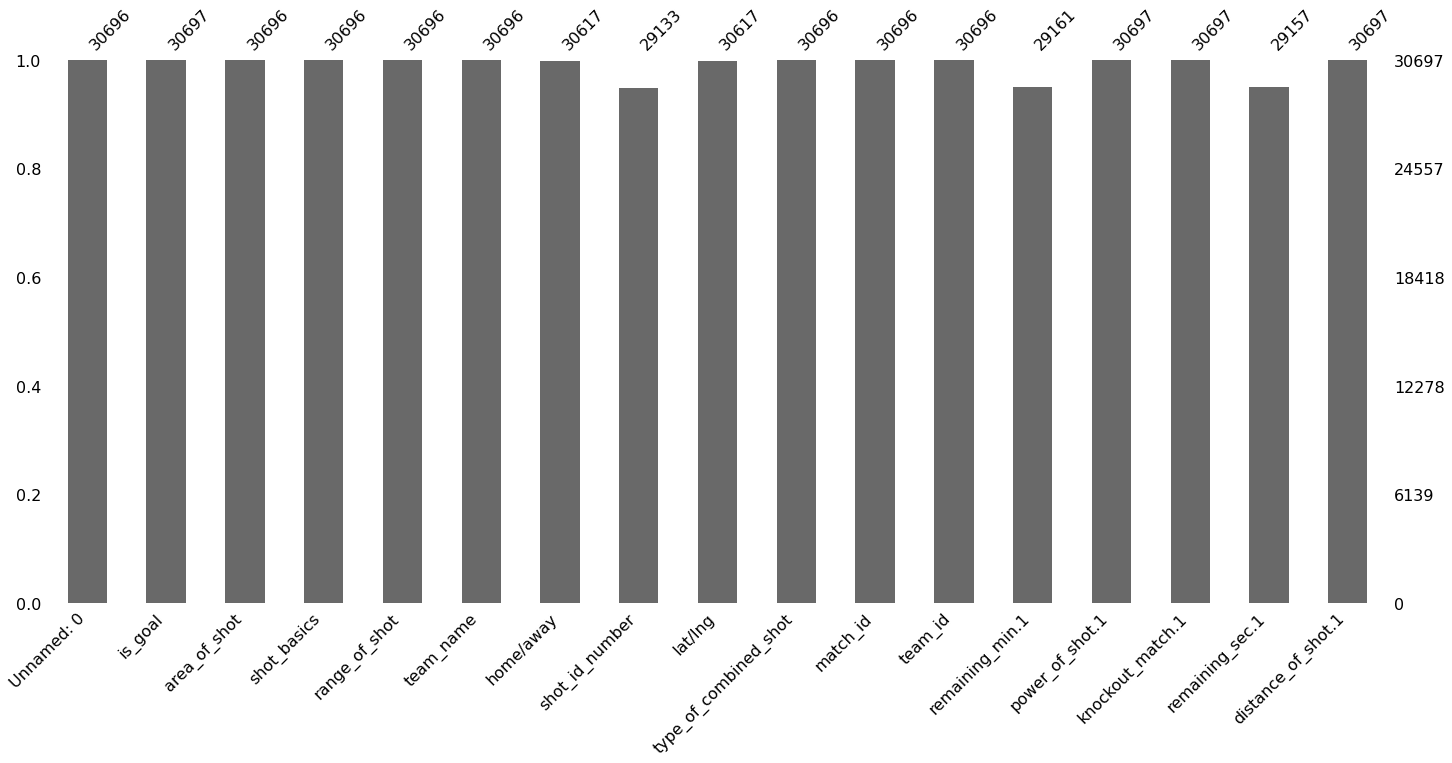

In [42]:
columns = ['Unnamed: 0','is_goal','area_of_shot','shot_basics','range_of_shot','team_name','home/away','shot_id_number','lat/lng','type_of_combined_shot','match_id','team_id','remaining_min.1','power_of_shot.1','knockout_match.1','remaining_sec.1','distance_of_shot.1']
yds_data = yds_data[columns]
msno.bar(yds_data)

#### Impute remaning categorical columns

C:\Users\DineshNaik\anaconda3\envs\envbik\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


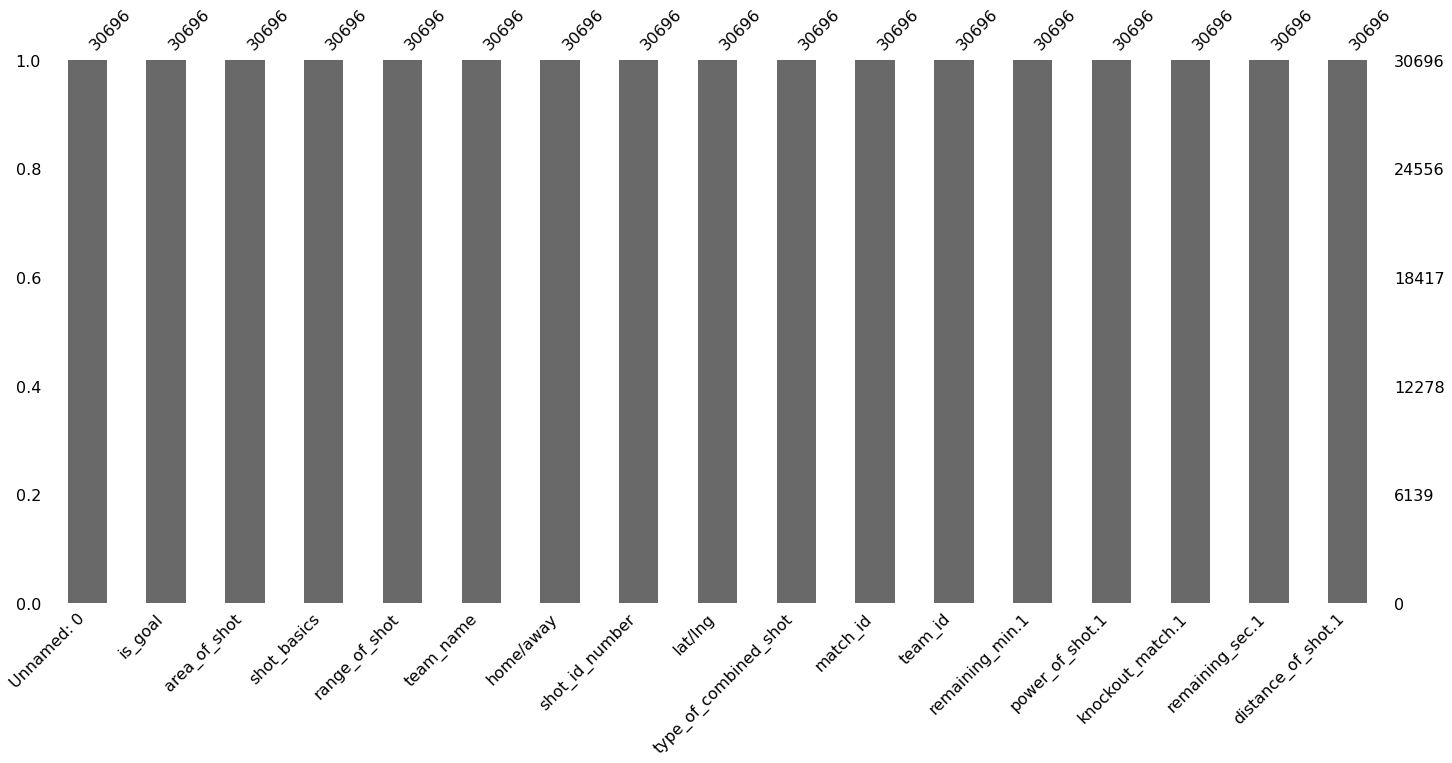

In [43]:
col = ['shot_id_number','home/away','lat/lng','remaining_min.1','remaining_sec.1']
for c in col:
    yds_data[c].fillna(yds_data[c].mode()[0],inplace=True)
yds_data = yds_data[yds_data['Unnamed: 0'].notnull()]    
msno.bar(yds_data)

In [44]:
cat_col = ['team_name','home/away','lat/lng','type_of_combined_shot']
for col in cat_col:
    #yds_data[col]=yds_data[col].apply(lambda x: pd.factorize(str(x))[0])
    yds_data[col]=yds_data[col].factorize()[0]
    
yds_data.head()    

,Unnamed: 0,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,home/away,shot_id_number,lat/lng,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0.0,1.0,0.0,0.0,0.0,0,0,1.0,0,0,20000012.0,1.610613e+09,10.00,1.0,50.608,54.2000,38.0
1,1.0,0.0,1.0,0.0,1.0,0,0,2.0,0,1,20000012.0,1.610613e+09,10.00,1.0,28.800,22.0000,35.0
2,2.0,1.0,2.0,0.0,0.0,0,1,3.0,0,2,20000012.0,1.610613e+09,92.64,1.0,0.000,63.7216,54.4
3,3.0,0.0,3.0,0.0,0.0,0,0,4.0,0,3,20000012.0,1.610613e+09,0.00,1.0,122.608,52.0000,42.0
4,4.0,1.0,4.0,1.0,2.0,1,0,5.0,0,4,20000012.0,1.610613e+09,42.64,2.0,0.000,19.0000,20.0


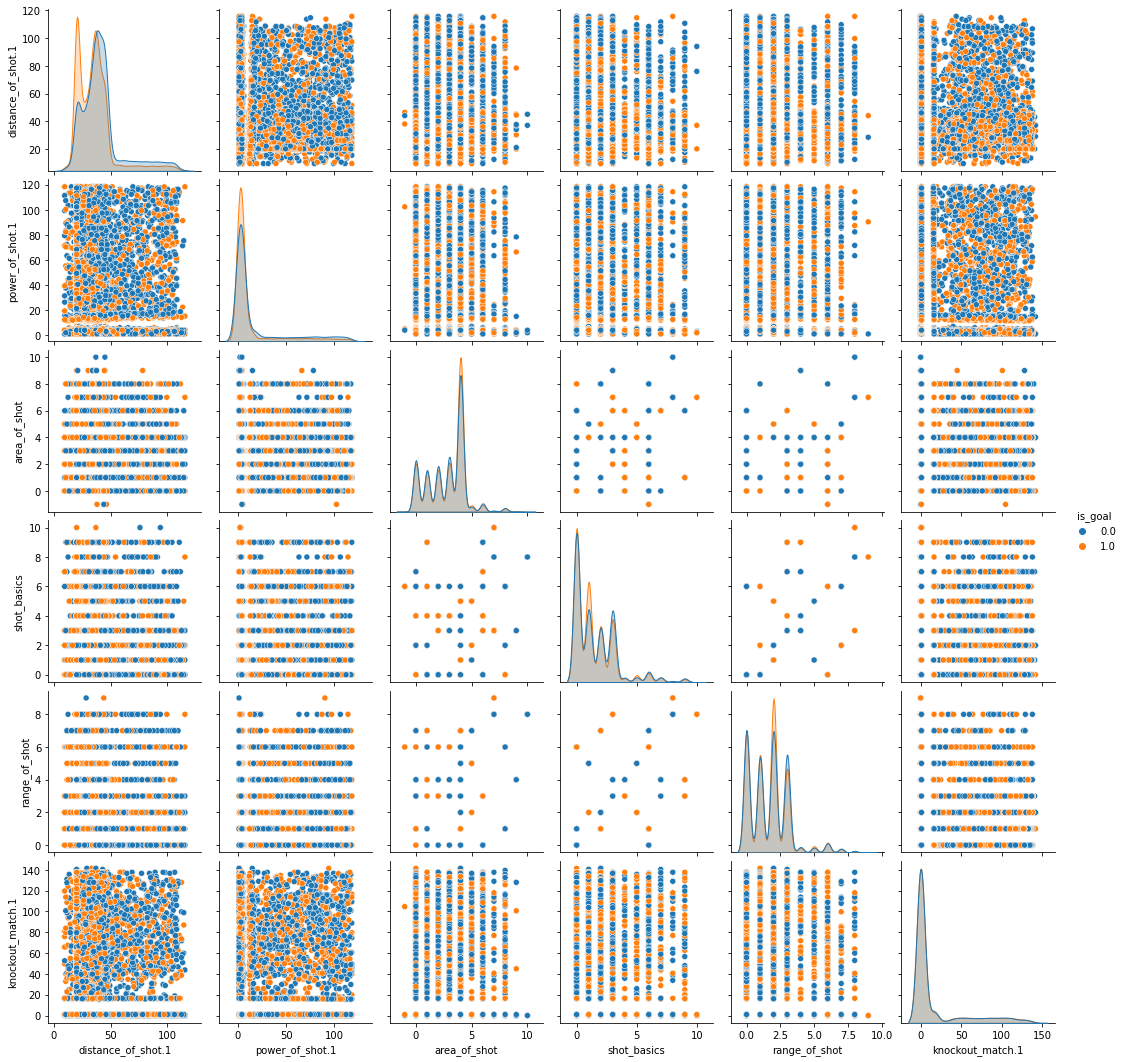

In [45]:
pairplot_col = ['is_goal','distance_of_shot.1',
 'power_of_shot.1',
 'area_of_shot',
 'shot_basics',
 'range_of_shot',
 'knockout_match.1']
sns.pairplot(yds_data[pairplot_col],hue="is_goal")

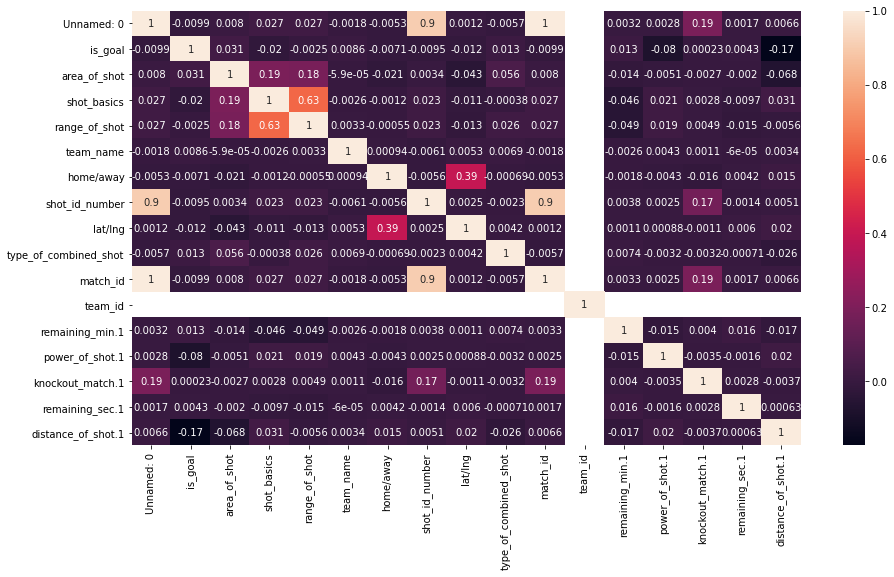

In [46]:
#Get Correlation between different variables
#num_dtype_col = yds_data.select_dtypes(include=np.number).columns.tolist()
corr = yds_data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
#yds_data.columns

#### Feature Extraction - ExtraTreeClassifier

[0.08206771 0.05241367 0.03572418 0.0381384  0.00997762 0.07700323
 0.08095227 0.0616762  0.07140786 0.07490701 0.0818547  0.08934417
 0.04685958 0.08716531 0.11050807]


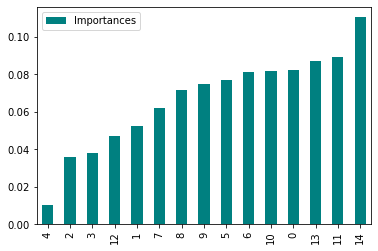

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
x_col = ['Unnamed: 0','area_of_shot','shot_basics','range_of_shot','team_name','home/away','shot_id_number','lat/lng','type_of_combined_shot','match_id','remaining_min.1','power_of_shot.1','knockout_match.1','remaining_sec.1','distance_of_shot.1']
y_col = ['is_goal']

X = yds_data[x_col].values[:,0:15]
Y = yds_data[y_col].values[:,0].astype('int')

#feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X,Y)
#Get the importance of resulting feature
importances = model.feature_importances_
print (importances)
#Create a data frame for visualization
final_df = pd.DataFrame({"Features": x_col, "Importances":importances})
final_df.set_index('Importances')

#Sort in ascending order to better visualization
final_df = final_df.sort_values('Importances')

#plot the feature importances in bars
final_df.plot.bar(color='teal')

#### Feature Extraction - RandomForestClassifier

[0.0970878  0.0341138  0.02475371 0.02532561 0.0069764  0.082452
 0.09517406 0.05193928 0.05998463 0.0869039  0.07990415 0.09378913
 0.04109615 0.09836586 0.12213351]


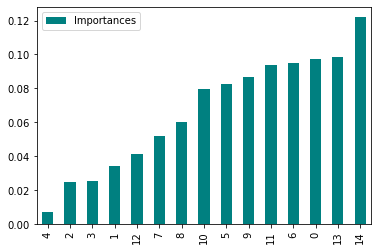

In [65]:
from sklearn.ensemble import RandomForestClassifier

#Create the random forest with hyperparameter
model = RandomForestClassifier(n_estimators=100)

# fit the model to start training
model.fit(X,Y)

#Get the importance of resulting feature
importances = model.feature_importances_
print (importances)
#Create a data frame for visualization
final_df = pd.DataFrame({"Features": x_col, "Importances":importances})
final_df.set_index('Importances')

#Sort in ascending order to better visualization
final_df = final_df.sort_values('Importances')

#plot the feature importances in bars
final_df.plot.bar(color='teal')

#### Feature Extraction - Information Gain

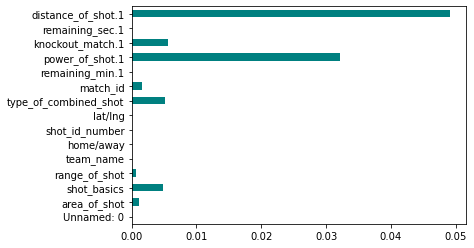

In [60]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,Y)
feat_importances = pd.Series(importances, x_col)
feat_importances.plot(kind='barh', color='teal')
plt.show()

#### Feature Extraction - Univariate Selection

[4.507e+00 2.129e+01 3.144e+01 7.722e-01 2.283e+00 2.753e+00 4.218e+00
 7.019e+00 2.653e-01 2.196e-01 4.221e-01 3.011e+02 7.466e-02 7.483e-01
 9.260e+02]


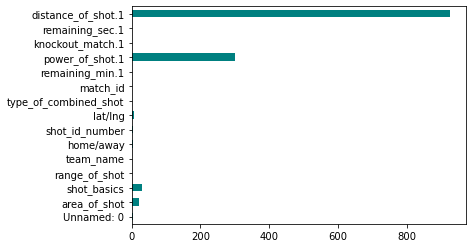

In [88]:
# Feature Selection with Univariate Statistical Tests
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, Y)
print (fit.scores_)
feat_importances = pd.Series(fit.scores_, x_col)
feat_importances.plot(kind='barh', color='teal')
plt.show()